In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cargando dataset

In [2]:
wines = datasets.load_wine()
wines.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

### Separando variables

In [3]:
X_wines = wines.data
Y_wines = wines.target 

In [4]:
x_w = pd.DataFrame(X_wines, columns=wines.feature_names)
x_w

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
y_w = pd.DataFrame(Y_wines, columns=['Target'])
y_w

,Target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


### Estimando un buen valor de K con método del codo

Text(0, 0.5, 'WCSS')

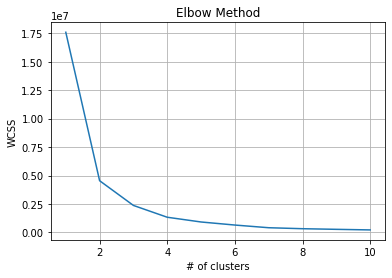

In [7]:
wcss = [] # (within-cluster sums of squares)


for i in range (1, 11): # Número de K's a evaluar
    kmeans = KMeans(n_clusters = i # Llamamos a evaluar al KMeans en el rango elegido
                    , max_iter = 1000 
                    , random_state = 0) 
    kmeans.fit(x_w) # Aquí entrenamos con nuestro dataset
    # .intertia_ --> Suma de distancias cuadradas de muestras a su centro de conglomerado más cercano.
    # las agregamos a la lista wcss
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss) #Dibuja X entre 1 y 10. En Y los valores de las sumas
plt.title('Elbow Method')
plt.grid()
plt.xlabel('# of clusters')
plt.ylabel('WCSS')

podemos ver que tenemos posibles valores en $k=2$ y $k=3$.

In [8]:
from sklearn import metrics
kmeans_model = KMeans(n_clusters=2, max_iter=1000)
kmeans_model.fit(x_w)
y_w_labels = kmeans_model.labels_

y_predicted = kmeans_model.predict(x_w)
accuracy = metrics.adjusted_rand_score(Y_wines, y_predicted)
print(accuracy)

0.3694075388574537


In [9]:
kmeans_model = KMeans(n_clusters=3, max_iter=1000)
kmeans_model.fit(x_w)
y_w_labels = kmeans_model.labels_

y_predicted = kmeans_model.predict(x_w)
accuracy = metrics.adjusted_rand_score(Y_wines, y_predicted)
print(accuracy)

0.37111371823084754


In [11]:
kmeans_model = KMeans(n_clusters=4, max_iter=1000)
kmeans_model.fit(x_w)
y_w_labels = kmeans_model.labels_

y_predicted = kmeans_model.predict(x_w)
accuracy = metrics.adjusted_rand_score(Y_wines, y_predicted)
print(accuracy)

0.3106188956951647


nos quedamos con $k=3$.

Podemos ver que tenemos un accuracy muy pequeño. Esto se debe a que **los datos no están previamente estandarizados**, la razón por la que debemos normalizar los datos antes de aplicar el modelo es porque estamos trabajando con datos que miden diferentes cosas, como la intensidad del color, la alcalinidad, el grado de alcohol, etc, estos son valores que no pueden ser comparados entre sí (es como sumar peras con manzanas) y por eso se debe estandarizar, es decir, aplicar un proceso estadístico que hace que todos los datos se ajusten a una curva de distribución normal y se situen en una misma escala que permita su comparacion, por eso es que el accuracy aumenta desde un 36-37%, hasta un 89%. 


Así que vamos a mejorar nuestros datos.

### Estandarización de los datos

In [13]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler #Necesario para la estandarizacion de los datos

In [15]:
scaler = StandardScaler()
scaler.fit(wines.data) # Escalamos todos los datos

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
# Datos originales
x_w.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
X_scaled = scaler.transform(wines.data) 
X = pd.DataFrame(X_scaled, columns=wines.feature_names) # DataFrame a partir de los datos escalados
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [20]:
# Con Y no hay problema, así que los dejamos igual
Y = y_w
Y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


### Cálculando un buen K para los datos normalizados 

numero de n_clusters: 1 accurracy 0.0
numero de n_clusters: 2 accurracy 0.3743144926213686
numero de n_clusters: 3 accurracy 0.8974949815093207
numero de n_clusters: 4 accurracy 0.7176522078096298
numero de n_clusters: 5 accurracy 0.6522596239982745
numero de n_clusters: 6 accurracy 0.4711756673619874
numero de n_clusters: 7 accurracy 0.5552055060589047
numero de n_clusters: 8 accurracy 0.4494410109081154
numero de n_clusters: 9 accurracy 0.4016454388647701
numero de n_clusters: 10 accurracy 0.335712142246869


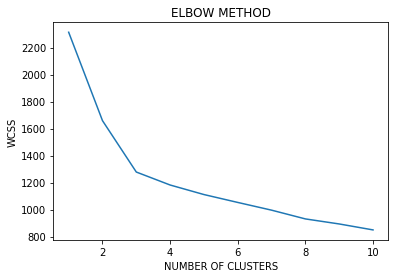

In [24]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(X)
    yw_kmeans = kmeans.predict(X)
    wcss.append(kmeans.inertia_)

    accuracy =  metrics.adjusted_rand_score(Y_wines, yw_kmeans)
    print(f'numero de n_clusters: {i} accurracy {accuracy}')
    
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

### Aplicando el modelo

predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
0.8974949815093207


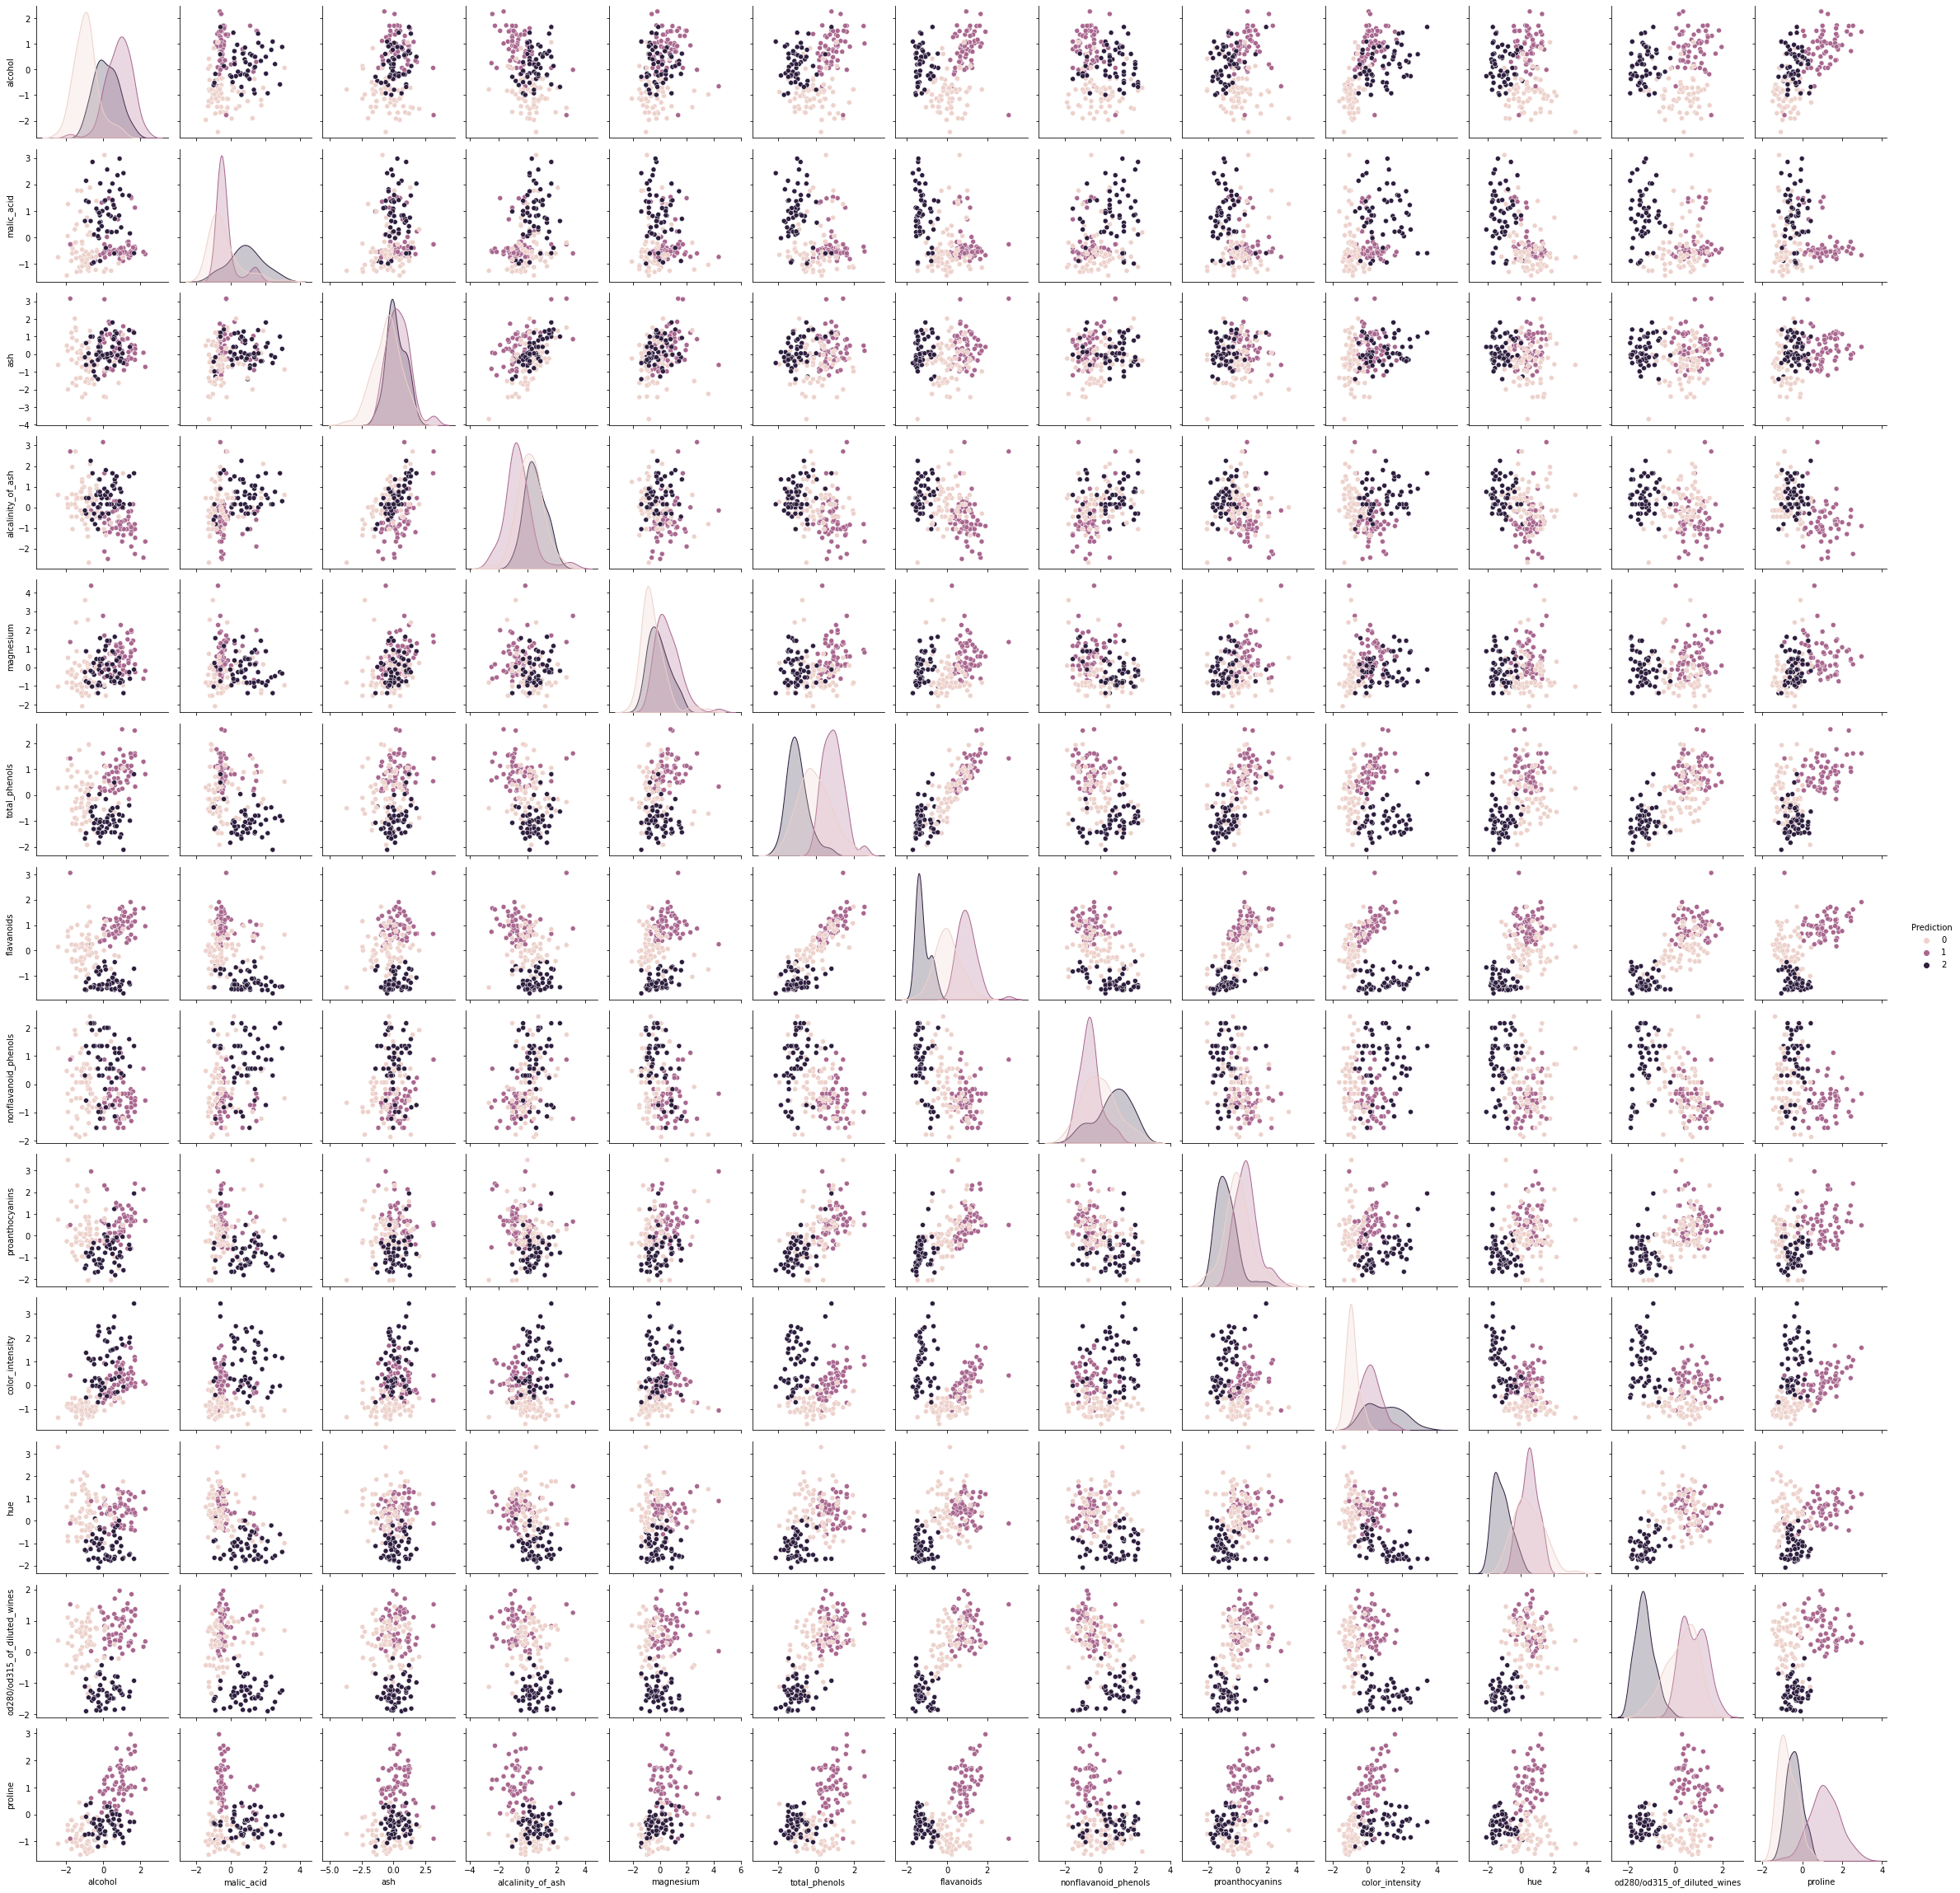

In [26]:
# Aplicando el modelo de KMeans
modelw = KMeans(n_clusters = 3, max_iter = 1000)
modelw.fit(X)

yw_labels = modelw.labels_
yw_kmeans = modelw.predict(X)
print('predicciones ', yw_kmeans)

yw_kmeans_df = pd.DataFrame(yw_kmeans, columns = ['Prediction'])

# Precisión del modelo
accuracyw =  metrics.adjusted_rand_score(Y_wines, yw_kmeans)
print(accuracyw)

# Concateno el dataset de entrada con el de la prediccion
Z = pd.concat([X, yw_kmeans_df],axis=1)

# Grafico para ver relación de las features con respecto a las 
# valores de la predicción, poniendo color según (0,1,2) 
# considerando las tres clases.
sns.pairplot(Z, hue = 'Prediction')

---